In [1]:
import numpy as np
# numpy is a library for handeling large number of data
import pandas as pd
# to use Dataframe
import matplotlib.pyplot as plt
import seaborn as sns
# are the libraries used for data visualization
from sklearn.preprocessing import LabelEncoder
# library to encode strings to numbers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# importing the data


In [2]:
mldata=pd.read_csv("mydata.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'mydata.csv'

In [7]:
mldata

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [8]:
mldata.shape

(50882, 14)

In [9]:
mldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

# data cleaning and dealing with missing values

In [10]:
mldata['Holding_Policy_Duration'].unique()


#this code displays the unique values in the attribute.

array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [11]:
mldata['Holding_Policy_Duration'].replace({'14+':16},inplace=True)
# this code replaces all the 14+ to 15 so that it can be an integer

In [12]:
mldata['Holding_Policy_Duration'].fillna(0,inplace=True)
mldata['Holding_Policy_Type'].fillna(0, inplace=True)

In [13]:
mldata.drop('ID', axis=1, inplace=True)
# this is to drop the id as it is not important and can mess our data

In [14]:
categorigal_variables=['City_Code','Health Indicator']
# these are the attributes with categorigal variables

In [15]:
mldata['Holding_Policy_Duration']=pd.to_numeric(mldata['Holding_Policy_Duration'])
# turns the numbers into floats

In [16]:
mldata['Health Indicator'].fillna('X0',inplace=True)

# data visualization that helps with understanding my data

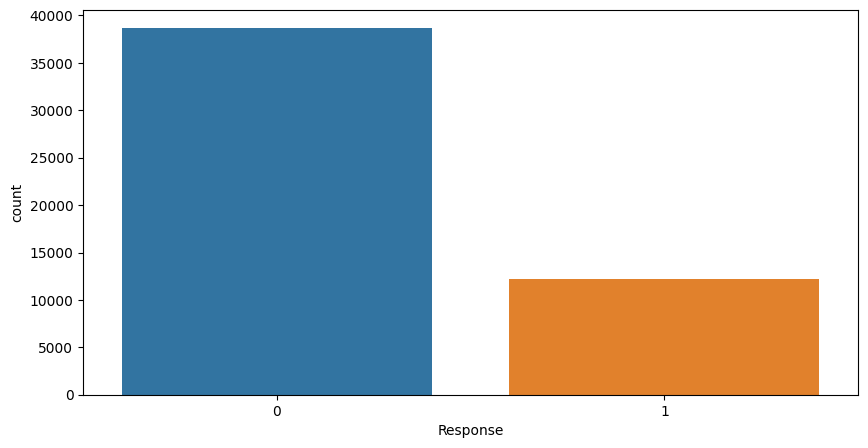

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Response', data=mldata)

plt.show()

# this shows that the data is totally not balanced

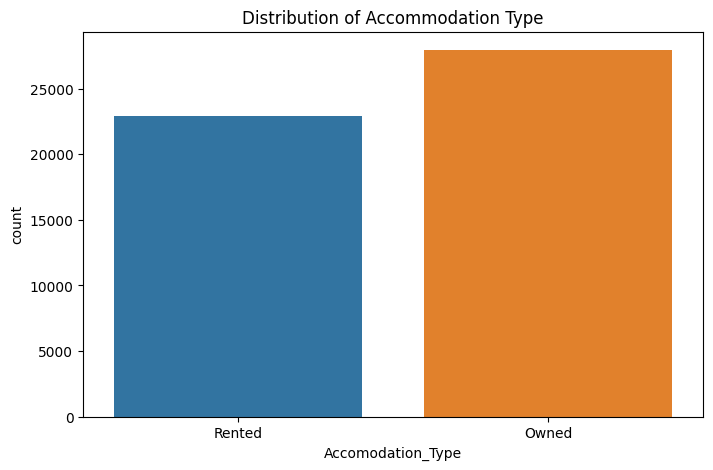

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Accomodation_Type', data=mldata)
plt.title('Distribution of Accommodation Type')
plt.show()

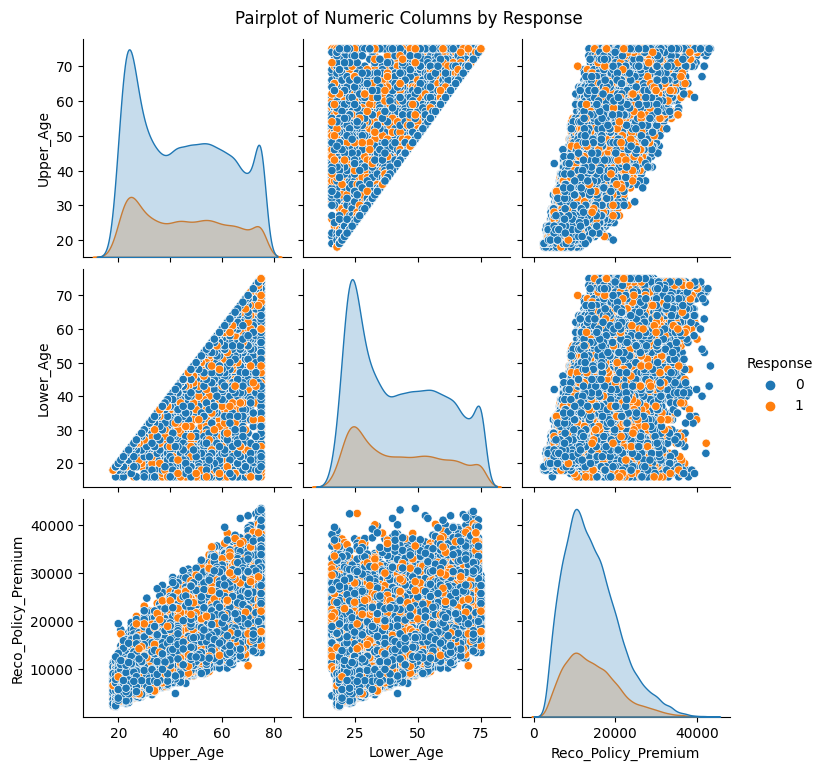

In [19]:
numeric_columns = ['Upper_Age', 'Lower_Age', 'Reco_Policy_Premium']
sns.pairplot(mldata, hue='Response', vars=numeric_columns)
plt.suptitle('Pairplot of Numeric Columns by Response', y=1.02)
plt.show()
# this plot shows the relationship between these 3 numeric columns with the response

<ipython-input-20-a6d3a449a859>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = mldata.corr().round(2)


<Axes: >

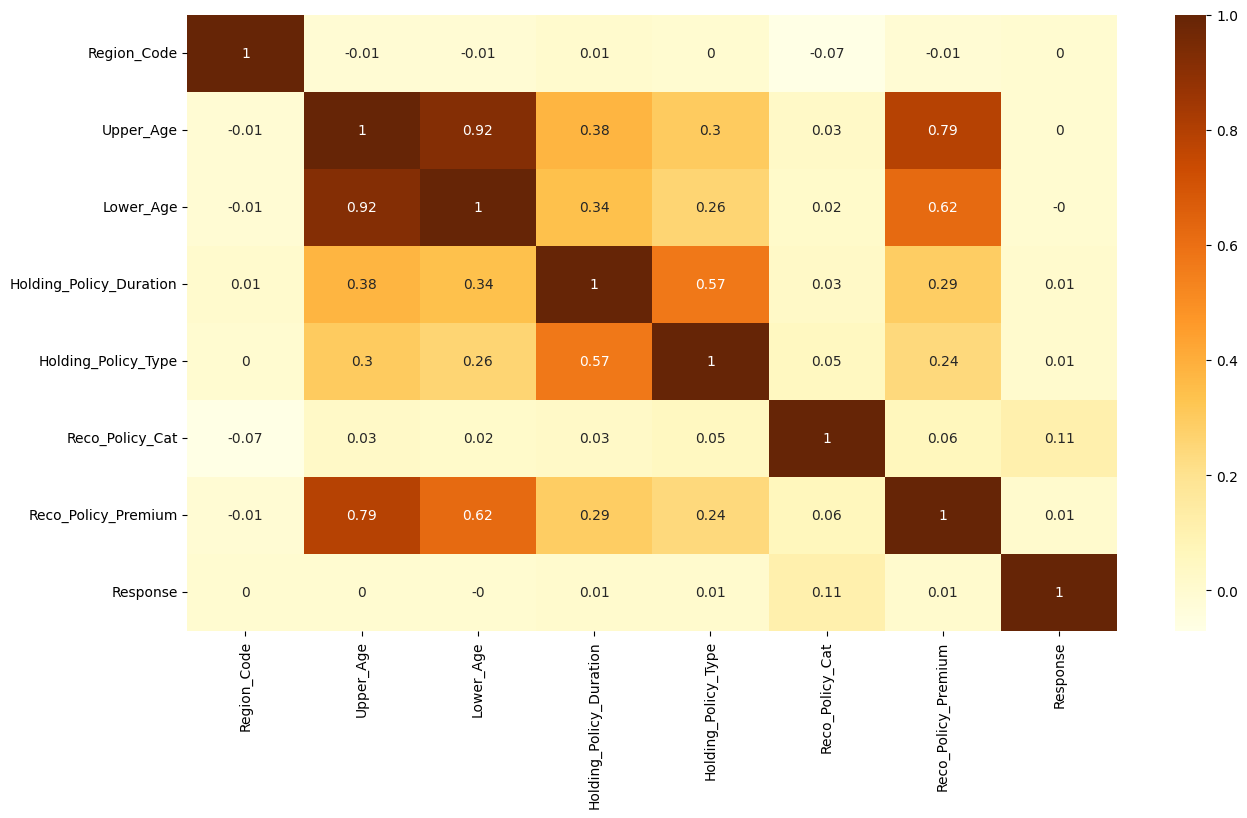

In [20]:
correlation = mldata.corr().round(2)
plt.figure(figsize = (15,8))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [21]:
mldata.drop('Upper_Age', axis=1, inplace=True)
mldata.drop('Reco_Insurance_Type', axis=1, inplace=True)

# i removed the upper age because the colleration of it with lower age is so high

<ipython-input-22-4fe7bbaee5f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = mldata.corr().round(2)


<Axes: >

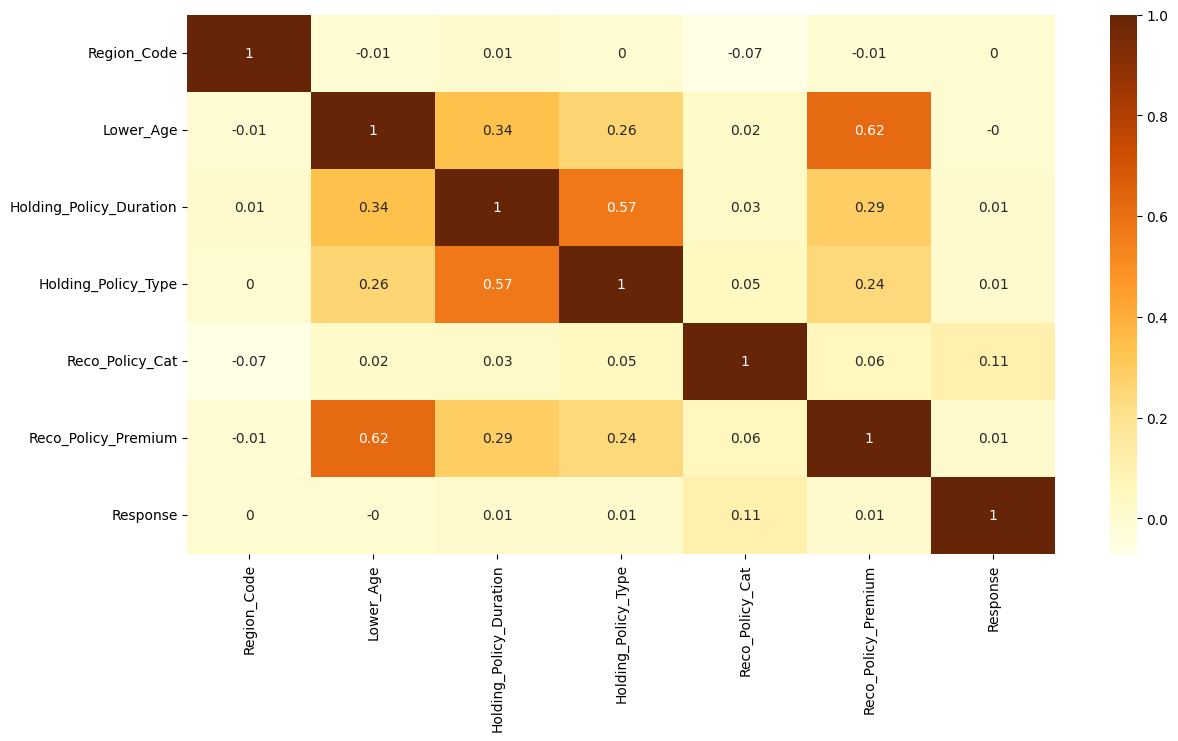

In [22]:
correlation = mldata.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

# encoding the text into numbers

In [31]:
# these are the columns we need to encode
columns_to_label_encode = [0, 2, 3, 4,5, 6, 7]

label_encoder = LabelEncoder()

for column_index in columns_to_label_encode:
    if mldata.iloc[:, column_index].dtype == 'O':
        mldata.iloc[:, column_index] = label_encoder.fit_transform(mldata.iloc[:, column_index])

mldata

<ipython-input-31-764f898a8f4a>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  mldata.iloc[:, column_index] = label_encoder.fit_transform(mldata.iloc[:, column_index])
<ipython-input-31-764f898a8f4a>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  mldata.iloc[:, column_index] = label_encoder.fit_transform(mldata.iloc[:, column_index])


,City_Code,Region_Code,Accomodation_Type,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,22,3213,1,36,0,1,16.0,3.0,22,11628.0,0
1,31,1117,0,22,0,2,0.0,0.0,22,30510.0,0
2,31,3732,0,32,0,0,1.0,1.0,19,7450.0,1
3,16,4378,0,48,0,1,16.0,3.0,19,17780.0,0
4,34,2190,1,44,0,2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...
50877,30,845,1,22,0,3,0.0,0.0,18,7704.0,0
50878,31,4188,1,27,0,3,7.0,3.0,4,5408.0,0
50879,0,442,1,63,0,2,16.0,1.0,12,11374.0,0
50880,0,4,0,49,0,2,2.0,2.0,16,28179.2,1


# splitting the data into x and y

In [32]:
X = mldata.iloc[:, :-1].values
y = mldata.iloc[:, -1].values

In [33]:
print(X)

[[2.20000e+01 3.21300e+03 1.00000e+00 ... 3.00000e+00 2.20000e+01
  1.16280e+04]
 [3.10000e+01 1.11700e+03 0.00000e+00 ... 0.00000e+00 2.20000e+01
  3.05100e+04]
 [3.10000e+01 3.73200e+03 0.00000e+00 ... 1.00000e+00 1.90000e+01
  7.45000e+03]
 ...
 [0.00000e+00 4.42000e+02 1.00000e+00 ... 1.00000e+00 1.20000e+01
  1.13740e+04]
 [0.00000e+00 4.00000e+00 0.00000e+00 ... 2.00000e+00 1.60000e+01
  2.81792e+04]
 [2.20000e+01 3.86600e+03 1.00000e+00 ... 3.00000e+00 1.80000e+01
  1.14240e+04]]


In [34]:
print(y)

[0 0 1 ... 0 1 0]


# splitting the data into train and test dataset

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# feature scalling

In [36]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# balancing the data

In [37]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print the bar chart again to make sure the data is balanced

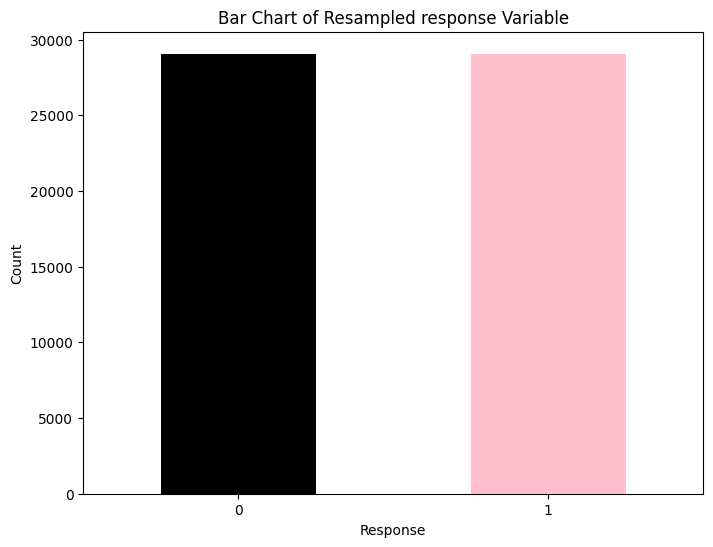

In [38]:

y_train_resampled_series = pd.Series(y_train_resampled)

# Plot a bar chart
plt.figure(figsize=(8, 6))
y_train_resampled_series.value_counts().plot(kind='bar', color=['black', 'pink'])
plt.title('Bar Chart of Resampled response Variable')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [39]:
print(X_train)

[[-0.6538146   0.58578187  1.10428122 ... -1.02266255  0.7722748
  -1.17931488]
 [ 0.58013117  0.52268996 -0.90556643 ...  1.0682307   0.61470907
   2.37253917]
 [-0.9828668   0.87320057  1.10428122 ... -0.32569813  0.7722748
  -1.05468842]
 ...
 [ 1.64955083 -0.78120952  1.10428122 ...  1.76519511  0.92984052
  -0.64737268]
 [-1.22965595 -1.16326609 -0.90556643 ...  1.0682307   1.08740625
   1.70913126]
 [-0.40702544  2.79049361 -0.90556643 ... -1.02266255 -0.9609482
   0.07363697]]


In [40]:
print(y_train_resampled)

[0 0 0 ... 1 1 1]


# logistic reggressionn model

In [41]:
lr_model= LogisticRegression(random_state=0)
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=0)

hyperparameters

In [42]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


In [43]:
y_pred=lr_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.7552079239053534
[[0 1]
 [0 0]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


cross validation

In [44]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the evaluation metric (accuracy in this case)
scorer = make_scorer(accuracy_score)

# Perform cross-validation
cross_val_results = cross_val_score(lr_model, X, y, cv=cv, scoring=scorer)

# Display the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean Accuracy:", cross_val_results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Results: [0.76004717 0.76004717 0.76012186 0.76002358 0.76002358]
Mean Accuracy: 0.7600526711019977


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      9607
           1       0.00      0.00      0.00      3114

    accuracy                           0.76     12721
   macro avg       0.38      0.50      0.43     12721
weighted avg       0.57      0.76      0.65     12721



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


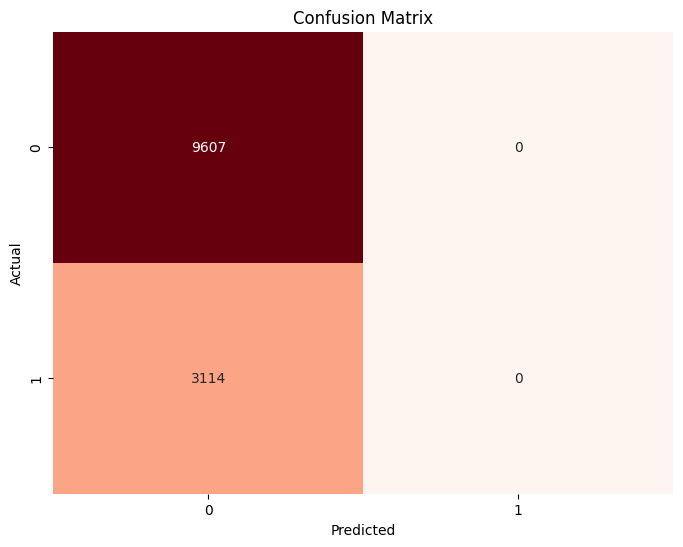

In [46]:
con_2=confusion_matrix(y_test,y_pred)
#a heatmap for it to be easier
plt.figure(figsize=(8, 6))
sns.heatmap(con_2, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

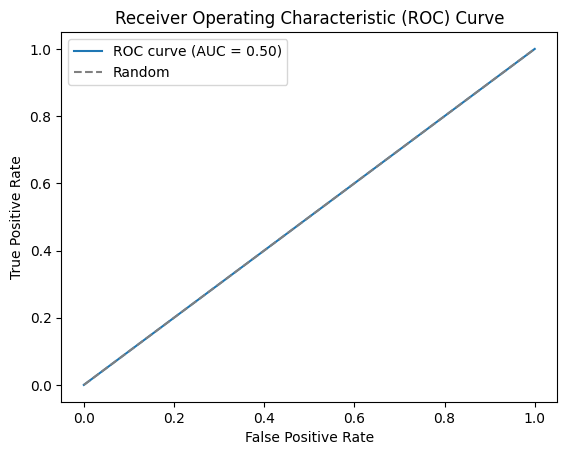

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# random forest model

In [48]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = rf_classifier.predict(X_test)


In [50]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:' ,accuracy_score(y_test, y_pred))

Accuracy: 0.7348478893168776


cross validation

In [51]:

# Specify the cross-validation strategy (Stratified K-Fold for classification problems)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the evaluation metric (accuracy in this case)
scorer = make_scorer(accuracy_score)

# Perform cross-validation
cross_val_results = cross_val_score(rf_classifier, X, y, cv=cv, scoring=scorer)

# Display the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean Accuracy:", cross_val_results.mean())

Cross-Validation Results: [0.75700108 0.75611673 0.75461871 0.7586478  0.76022013]
Mean Accuracy: 0.7573208899800574


In [52]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      9607
           1       0.37      0.12      0.19      3114

    accuracy                           0.73     12721
   macro avg       0.57      0.53      0.51     12721
weighted avg       0.67      0.73      0.68     12721



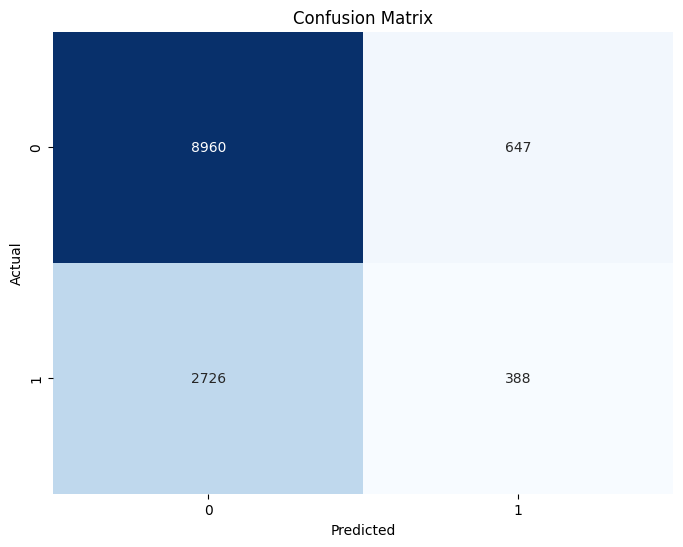

In [53]:
con_1=confusion_matrix(y_test,y_pred)
#a heatmap for it to be easier
plt.figure(figsize=(8, 6))
sns.heatmap(con_1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

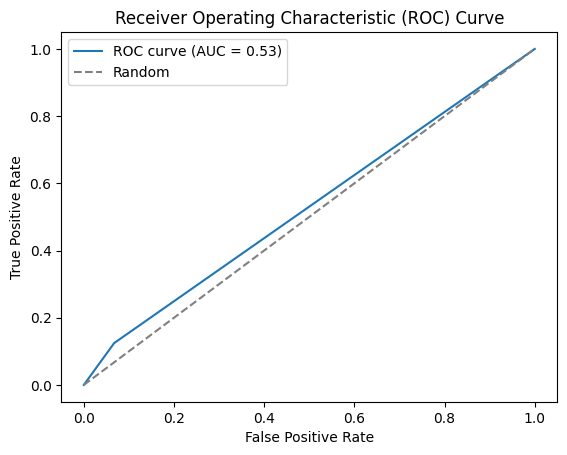

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# SVM MODEL


In [57]:

svm_classifier = SVC(kernel='linear', random_state=0)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:' ,accuracy_score(y_test, y_pred))


Accuracy: 0.7552079239053534


In [58]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      9607
           1       0.00      0.00      0.00      3114

    accuracy                           0.76     12721
   macro avg       0.38      0.50      0.43     12721
weighted avg       0.57      0.76      0.65     12721



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


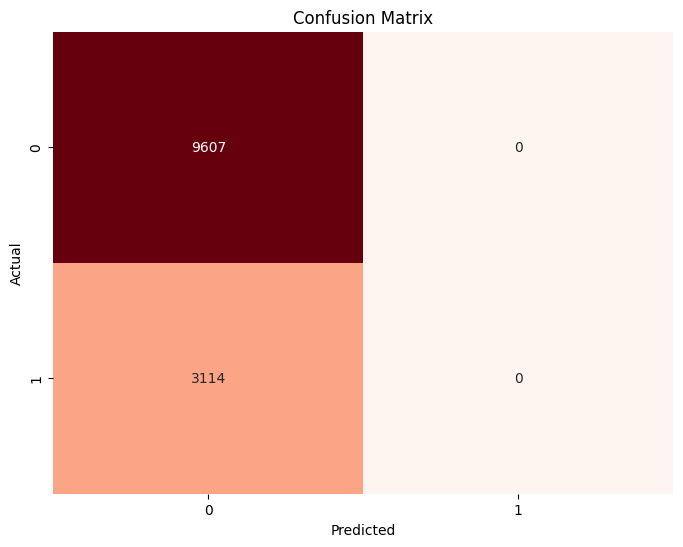

In [59]:
con=confusion_matrix(y_test,y_pred)
#a heatmap for it to be easier
plt.figure(figsize=(8, 6))
sns.heatmap(con, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

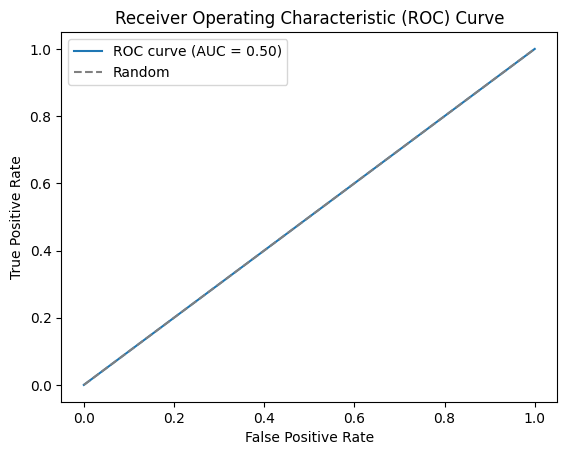

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# nural network

In [61]:
# Building the neural network model
nural_model = Sequential()
nural_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # Input layer with 64 neurons
nural_model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
nural_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
nural_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nural_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = (nural_model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

Epoch 1/20
954/954 [==============================] - 5s 5ms/step - loss: 0.5457 - accuracy: 0.7612 - val_loss: 0.5409 - val_accuracy: 0.7621
Epoch 2/20
954/954 [==============================] - 2s 2ms/step - loss: 0.5404 - accuracy: 0.7616 - val_loss: 0.5404 - val_accuracy: 0.7621
Epoch 3/20
954/954 [==============================] - 3s 3ms/step - loss: 0.5388 - accuracy: 0.7616 - val_loss: 0.5388 - val_accuracy: 0.7621
Epoch 4/20
954/954 [==============================] - 4s 4ms/step - loss: 0.5377 - accuracy: 0.7616 - val_loss: 0.5397 - val_accuracy: 0.7621
Epoch 5/20
954/954 [==============================] - 3s 3ms/step - loss: 0.5366 - accuracy: 0.7616 - val_loss: 0.5399 - val_accuracy: 0.7621
Epoch 6/20
954/954 [==============================] - 2s 3ms/step - loss: 0.5361 - accuracy: 0.7616 - val_loss: 0.5398 - val_accuracy: 0.7621
Epoch 7/20
954/954 [==============================] - 2s 2ms/step - loss: 0.5357 - accuracy: 0.7616 - val_loss: 0.5403 - val_accuracy: 0.7621
Epoch 

0.7545004323559469

In [62]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      9607
           1       0.30      0.00      0.00      3114

    accuracy                           0.75     12721
   macro avg       0.53      0.50      0.43     12721
weighted avg       0.64      0.75      0.65     12721



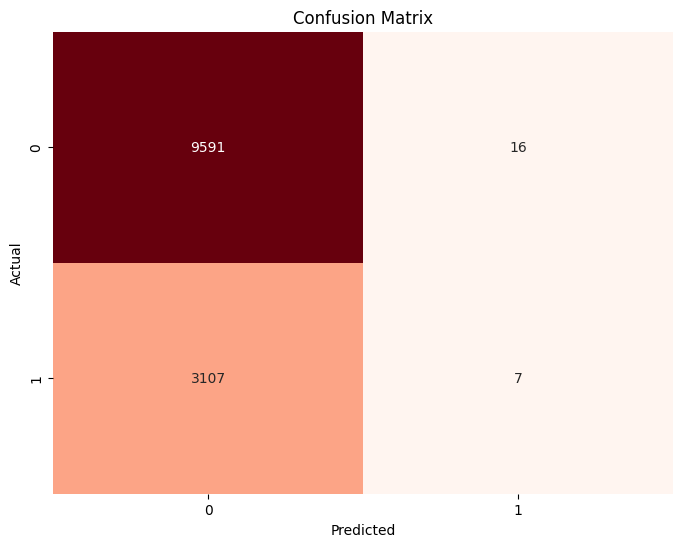

In [63]:
con=confusion_matrix(y_test,y_pred)
#a heatmap for it to be easier
plt.figure(figsize=(8, 6))
sns.heatmap(con, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

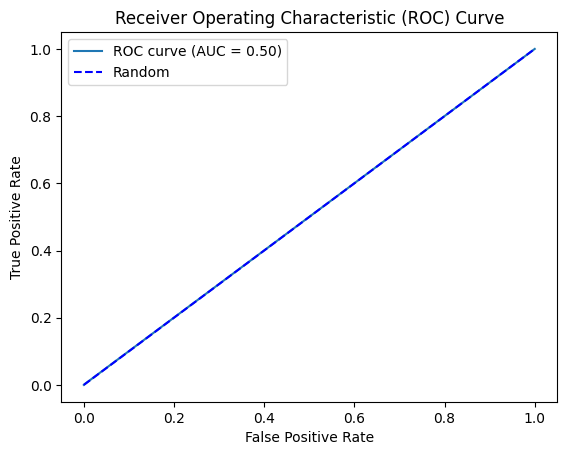

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

398/398 [==============================] - 1s 2ms/step


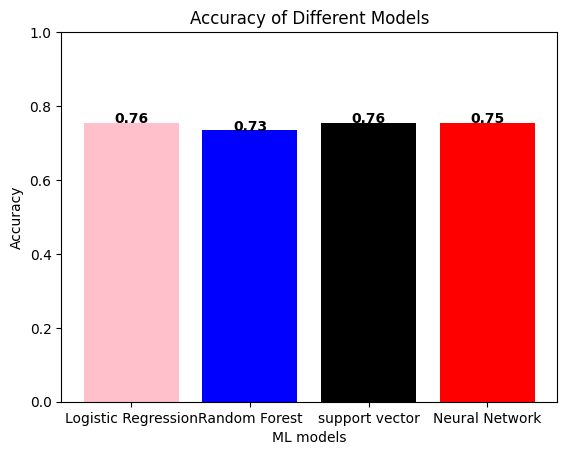

In [67]:
# Store accuracies for each model
accuracies = []

# Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_model.predict(X_test))
accuracies.append(lr_accuracy)

# Random Forest
rf_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))
accuracies.append(rf_accuracy)

# SVM
svm_accuracy = accuracy_score(y_test, svm_classifier.predict(X_test))
accuracies.append(svm_accuracy)

# Neural Network
nn_accuracy = accuracy_score(y_test, (nural_model.predict(X_test) > 0.5).astype(int))
accuracies.append(nn_accuracy)
# Display accuracies above each bar
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='center', color='black', fontweight='bold')
# Create a bar chart
models = ['Logistic Regression', 'Random Forest', 'support vector', 'Neural Network']
plt.bar(models, accuracies, color=['pink', 'blue', 'black', 'red'])
plt.xlabel('ML models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim([0, 1])  # Set y-axis limit to 0-1 for accuracy values
plt.show()